In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("heights.csv")
df.sample(5)

,gender,height
8017,Female,61.549107
5436,Female,62.611869
8544,Female,64.991478
8871,Female,64.267174
3831,Male,72.497391


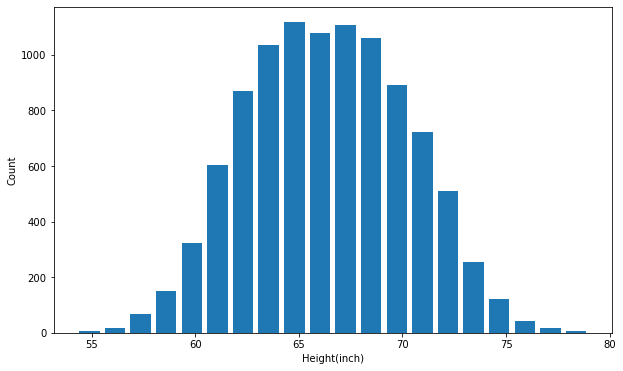

In [5]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height(inch)')
plt.ylabel('Count')
plt.show()

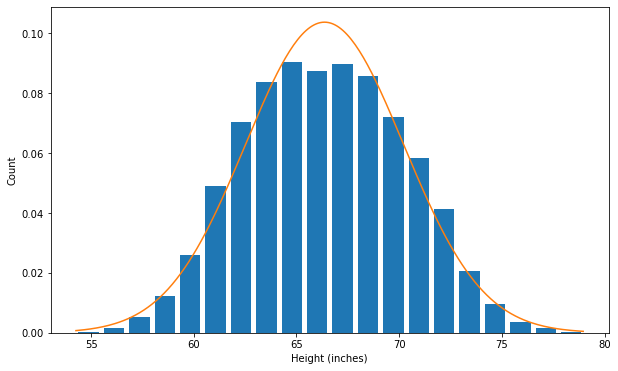

In [6]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [7]:
df.height.mean()

66.3675597548656

In [8]:
df.height.std()

3.847528120795573

In [9]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725232

In [11]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392478876

In [12]:
df.shape

(10000, 2)

In [13]:
df2=df[(df.height<upper_limit)&(df.height>lower_limit)]
df2.shape

(9993, 2)

In [19]:
df2['zscore']=(df2.height-df2.height.mean())/df2.height.std()
df2.head()

<ipython-input-19-4ace63e91b5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore']=(df2.height-df2.height.mean())/df2.height.std()


,gender,height,zscore
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202


In [21]:
df.shape

(10000, 3)

In [22]:
df3=df2[(df['zscore']<3)&(df2['zscore']>-3)]
df3    

<ipython-input-22-87ed124b964c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[(df['zscore']<3)&(df2['zscore']>-3)]


,gender,height,zscore
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202
...,...,...,...
9995,Female,66.172652,-0.049851
9996,Female,67.067155,0.183365
9997,Female,63.867992,-0.650725
9998,Female,69.034243,0.696227


In [23]:
df3.shape

(9993, 3)